(<Axes: >, <matplotlib.image.AxesImage at 0x7f87d6d334d0>)

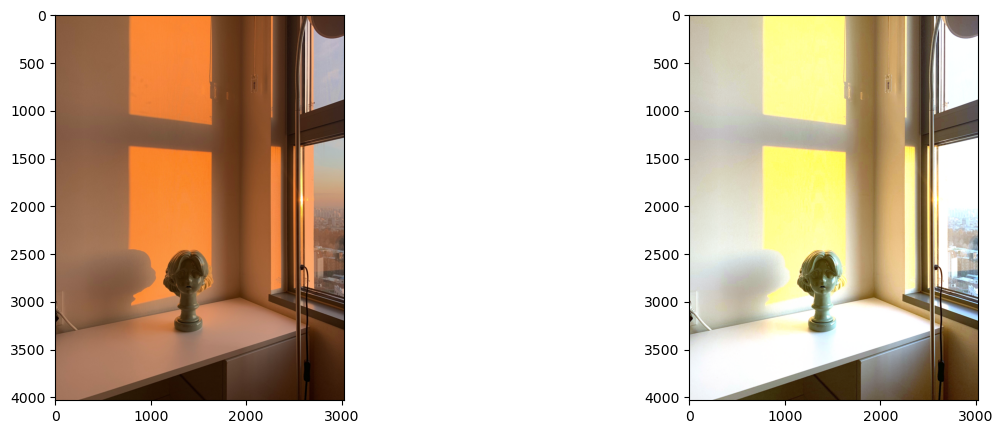

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

img = cv2.imread('room.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#white balance
# Define white patch and the coefficients
row, col = 3500, 500 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<Axes: >, <matplotlib.image.AxesImage at 0x7f87db1fd750>)

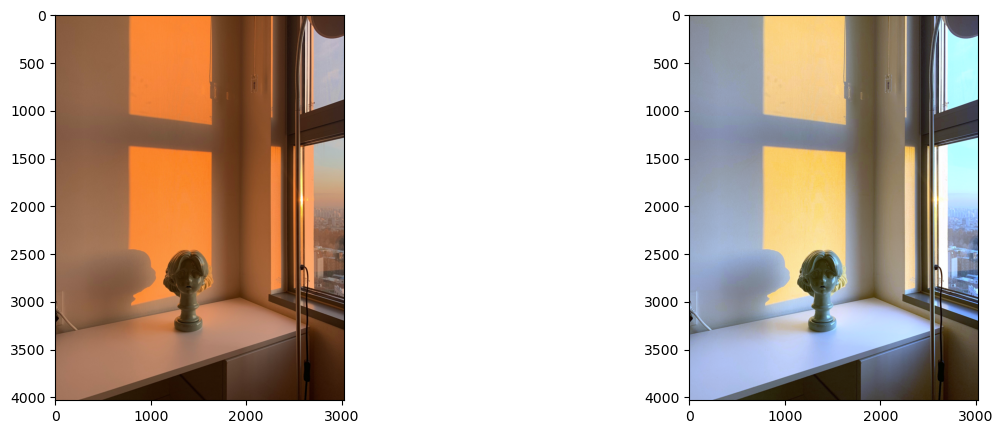

In [47]:
#Gray world
# Load your image
img = cv2.imread('room.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:,:,0])
mean_g = np.mean(img[:,:,1])
mean_b = np.mean(img[:,:,2])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

means = [mean_r, mean_g, mean_b]
kr = np.max(means)/mean_r
kg = np.max(means)/mean_g
kb = np.max(means)/mean_b
coef = [kr, kg, kb]
# Apply color balancing and generate the balanced image
balanced =  np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coef[channel]
balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<Axes: >, <matplotlib.image.AxesImage at 0x7f87daaebc10>)

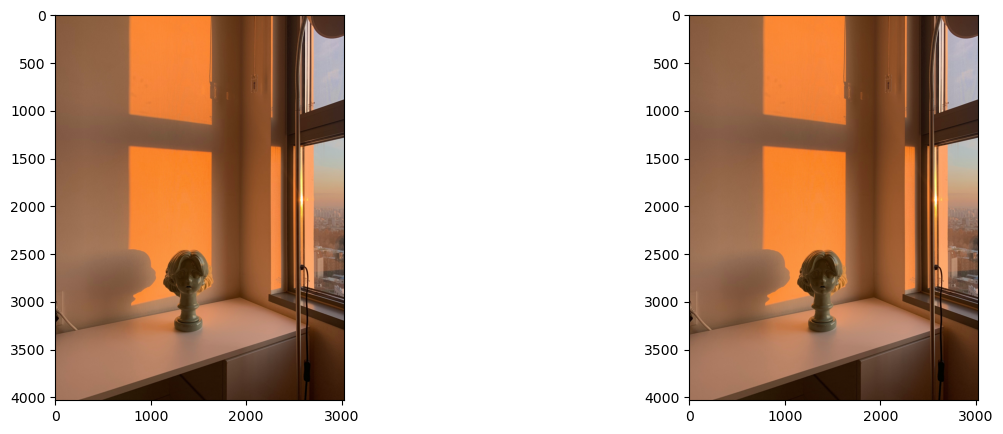

In [54]:
#Scale-by-max
# Load your image
img = cv2.imread('room.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:,:,0])
max_g = np.max(img[:,:,1])
max_b = np.max(img[:,:,2])
maxes = [max_r, max_g, max_b]

# Apply scale-by-max balancing and generate the balanced image
balanced =img/maxes

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)